In [16]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("adv.csv")
df.tail()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [21]:
df.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [ ]:
# sửa tên cột + xoá cột index
df = df.iloc[:, 1:]
df = df.rename(
    columns={
        "TV Ad Budget ($)": "TV", 
        "Radio Ad Budget ($)": "Radio", 
        "Newspaper Ad Budget ($)": "Newspaper", 
        "Sales ($)": "Sales"
    }
)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
# tính độ tương quản
corr_TV = df["Sales"].corr(df["TV"])
corr_TV

np.float64(0.7822244248616061)

In [24]:
corr_newspaper = df["Sales"].corr(df["Newspaper"])
corr_newspaper

np.float64(0.22829902637616528)

In [25]:
corr_Radio = df["Sales"].corr(df["Radio"])
corr_Radio

np.float64(0.5762225745710551)

Text(0.5, 1.0, 'ma trận tương quan giữa các biến')

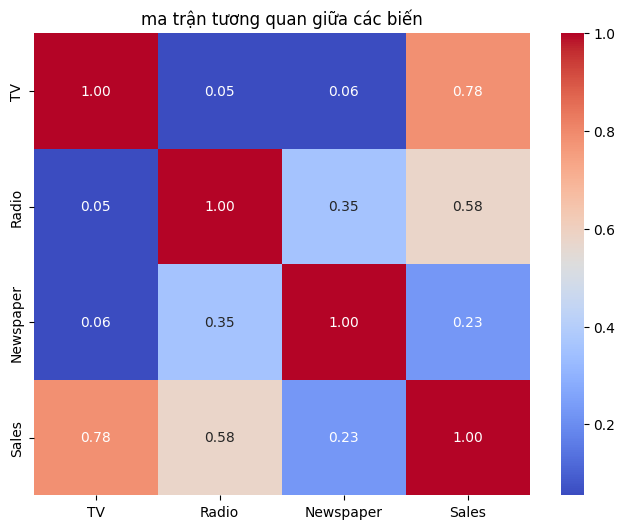

In [27]:
# vẽ bản tương quản (headtmap)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("ma trận tương quan giữa các biến")

In [28]:
# tạo mô hình cho Radio
model = LinearRegression()
X = df[["Radio"]]
y = df["Sales"]
model.fit(X, y)

model


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# tạo đường hồi quy (dự đoán)
y_pred = model.predict(X)



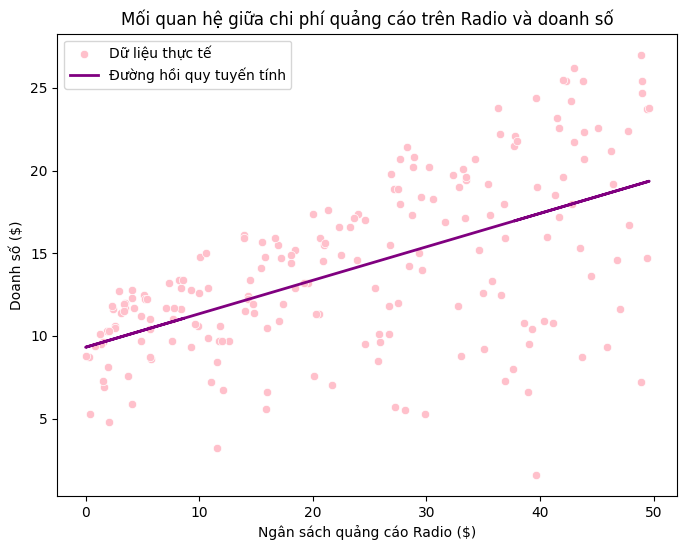

In [32]:
# vẽ biểu đồ hồi quy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["Radio"], y=y, color="pink", label="Dữ liệu thực tế")
plt.plot(
    X["Radio"], y_pred, color="purple", linewidth=2, label="Đường hồi quy tuyến tính"
)
plt.title("Mối quan hệ giữa chi phí quảng cáo trên Radio và doanh số")
plt.xlabel("Ngân sách quảng cáo Radio ($)")
plt.ylabel("Doanh số ($)")
plt.legend()
plt.show()


In [33]:
print("Hệ số hồi quy (slope):", model.coef_[0])
print("Hệ số chặn (intercept):", model.intercept_)
print(f"Phương trình: Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Radio")

Hệ số hồi quy (slope): 0.20249578339243965
Hệ số chặn (intercept): 9.311638095158283
Phương trình: Sales = 9.31 + 0.20 * Radio
